<a href="https://colab.research.google.com/github/alaka2019/Iris-Data-Analysis/blob/main/Iris_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **THE SPARKS FOUNDATION**

**Data Science & Business Analytics**

Task 2 : Prediction using Unsupervised ML

Problem Statement: 

From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually.


Dataset: https://bit.ly/3kXTdox

Importing required packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import files
files.upload()

Saving Iris.csv to Iris.csv


{'Iris.csv': b'Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species\n1,5.1,3.5,1.4,0.2,Iris-setosa\n2,4.9,3.0,1.4,0.2,Iris-setosa\n3,4.7,3.2,1.3,0.2,Iris-setosa\n4,4.6,3.1,1.5,0.2,Iris-setosa\n5,5.0,3.6,1.4,0.2,Iris-setosa\n6,5.4,3.9,1.7,0.4,Iris-setosa\n7,4.6,3.4,1.4,0.3,Iris-setosa\n8,5.0,3.4,1.5,0.2,Iris-setosa\n9,4.4,2.9,1.4,0.2,Iris-setosa\n10,4.9,3.1,1.5,0.1,Iris-setosa\n11,5.4,3.7,1.5,0.2,Iris-setosa\n12,4.8,3.4,1.6,0.2,Iris-setosa\n13,4.8,3.0,1.4,0.1,Iris-setosa\n14,4.3,3.0,1.1,0.1,Iris-setosa\n15,5.8,4.0,1.2,0.2,Iris-setosa\n16,5.7,4.4,1.5,0.4,Iris-setosa\n17,5.4,3.9,1.3,0.4,Iris-setosa\n18,5.1,3.5,1.4,0.3,Iris-setosa\n19,5.7,3.8,1.7,0.3,Iris-setosa\n20,5.1,3.8,1.5,0.3,Iris-setosa\n21,5.4,3.4,1.7,0.2,Iris-setosa\n22,5.1,3.7,1.5,0.4,Iris-setosa\n23,4.6,3.6,1.0,0.2,Iris-setosa\n24,5.1,3.3,1.7,0.5,Iris-setosa\n25,4.8,3.4,1.9,0.2,Iris-setosa\n26,5.0,3.0,1.6,0.2,Iris-setosa\n27,5.0,3.4,1.6,0.4,Iris-setosa\n28,5.2,3.5,1.5,0.2,Iris-setosa\n29,5.2,3.4,1.4,0.2,Iris-setosa\n

Reading the dataset

In [ ]:
iris=pd.read_csv('Iris.csv')
iris.shape

(150, 6)

In [ ]:
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

This dataset has 6 columns:

1.   Id
2.   SepalLengthCm
3.   SepalWidthCm
4.   PetalLengthCm
5.   PetalWidthCm
6.   Species

In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


'Species' column holds categorical values.

All other columns hold numerical values.

Exploratory Data Analysis

In [ ]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


Data Cleaning

In [ ]:
duplicates = iris.duplicated(subset=None, keep='first').sum()
print(duplicates)

0


In [ ]:
iris.drop(['Id'],axis=1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [ ]:
d = { 'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 }
iris['Species'] = iris['Species'].map(d)

In [ ]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
iris["SepalLengthCm"].value_counts()

5.0    10
6.3     9
5.1     9
6.7     8
5.7     8
5.5     7
5.8     7
6.4     7
6.0     6
4.9     6
6.1     6
5.4     6
5.6     6
6.5     5
4.8     5
7.7     4
6.9     4
5.2     4
6.2     4
4.6     4
7.2     3
6.8     3
4.4     3
5.9     3
6.6     2
4.7     2
7.6     1
7.4     1
4.3     1
7.9     1
7.3     1
7.0     1
4.5     1
5.3     1
7.1     1
Name: SepalLengthCm, dtype: int64

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


In [ ]:
iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


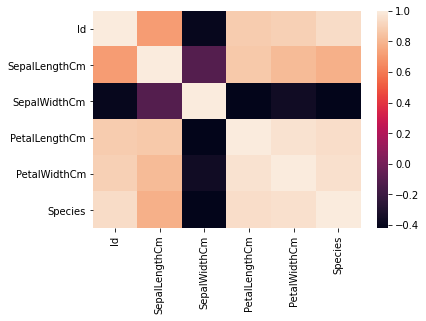

In [ ]:
sns.heatmap(iris.corr())

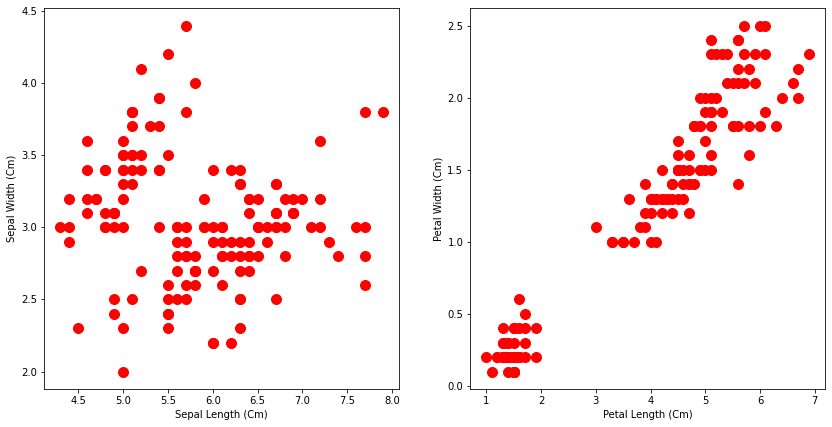

In [ ]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.scatter(iris['SepalLengthCm'],iris['SepalWidthCm'],s=100,c="red")
plt.xlabel("Sepal Length (Cm)")
plt.ylabel("Sepal Width (Cm)")

plt.subplot(1,2,2)
plt.scatter(iris['PetalLengthCm'],iris['PetalWidthCm'],s=100,c="red")
plt.xlabel("Petal Length (Cm)")
plt.ylabel("Petal Width (Cm)")
plt.show()

Finding the optimal number of clusters (Elbow Method)

In [ ]:
x = iris.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    

In [ ]:
wcss

[281831.54466666665,
 70581.3808,
 31320.711199999998,
 17762.657226173542,
 11423.238080088988,
 7909.530673076923,
 5881.448116883117,
 4562.7800793650795,
 3579.72056127451,
 2968.491432665374]

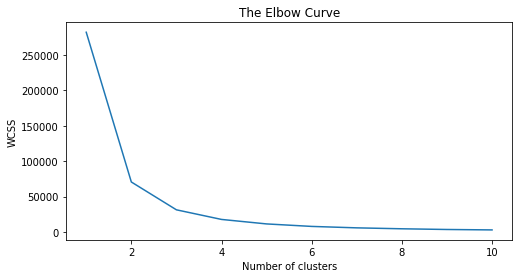

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

From the figure, we can deduce that the optimum number of clusters is 3.

Plotting and Visualising Clusters

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

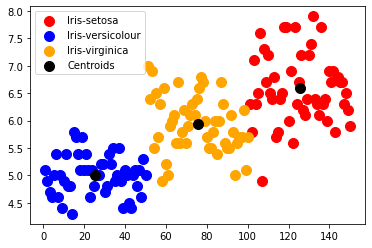

In [ ]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'orange', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()